In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
dataset_path = r'C:\Users\Hp\Downloads\VW_AI\dataset'

In [3]:
img_size = (150, 150)
batch_size = 32

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    dataset_path + '\\train\\',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 8 images belonging to 2 classes.


In [5]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    dataset_path + '\\validation\\',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 8 images belonging to 2 classes.


In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

Epoch 1/15


1/1 [==============================] - 4s 4s/step - loss: 0.7312 - accuracy: 0.3750 - val_loss: 0.7550 - val_accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 1s 781ms/step - loss: 0.7728 - accuracy: 0.5000 - val_loss: 0.6682 - val_accuracy: 0.6250
Epoch 3/15
1/1 [==============================] - 1s 844ms/step - loss: 0.8262 - accuracy: 0.2500 - val_loss: 0.6738 - val_accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 1s 690ms/step - loss: 0.7524 - accuracy: 0.1250 - val_loss: 0.6790 - val_accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 1s 935ms/step - loss: 0.9219 - accuracy: 0.5000 - val_loss: 0.6381 - val_accuracy: 0.5000
Epoch 6/15
1/1 [==============================] - 1s 684ms/step - loss: 0.6903 - accuracy: 0.6250 - val_loss: 0.6239 - val_accuracy: 0.7500
Epoch 7/15
1/1 [==============================] - 1s 920ms/step - loss: 0.8539 - accuracy: 0.3750 - val_loss: 0.6270 - val_accuracy: 0.8750
Epoch 8/15
1/1 [=====

In [9]:
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

1/1 [==============================] - 0s 374ms/step - loss: 0.6166 - accuracy: 0.7500
Validation Accuracy: 75.00%


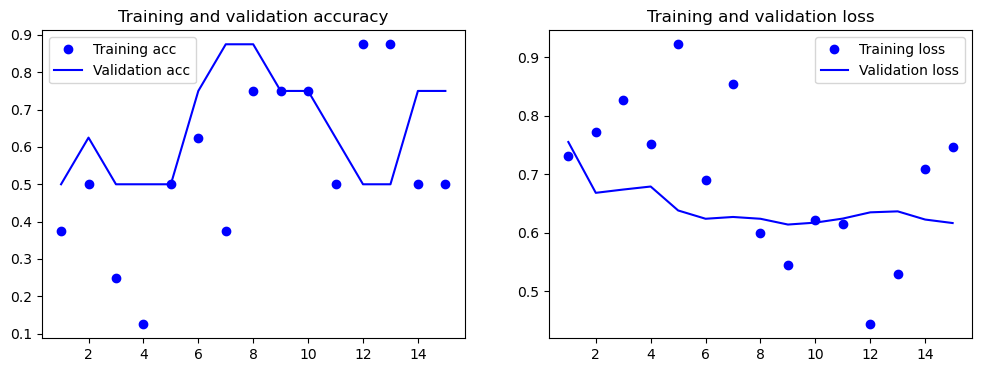

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()